In [20]:
# Question 1
#Step 1. import the necessary libraries
import pandas as pd

#Step 2. Import the dataset

dataset_users = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'

#Step 3. Assign it to a variable called users

users = pd.read_csv(dataset_users, sep = '|')

In [21]:
#Step 4. Discover what is the mean age per occupation

mean_age = users.groupby('occupation')['age'].mean()
table = pd.DataFrame({'Average':mean_age})
print (table)

                 Average
occupation              
administrator  38.746835
artist         31.392857
doctor         43.571429
educator       42.010526
engineer       36.388060
entertainment  29.222222
executive      38.718750
healthcare     41.562500
homemaker      32.571429
lawyer         36.750000
librarian      40.000000
marketing      37.615385
none           26.555556
other          34.523810
programmer     33.121212
retired        63.071429
salesman       35.666667
scientist      35.548387
student        22.081633
technician     33.148148
writer         36.311111


In [22]:
# Step 5. Discover the Male ratio per occupation and sort it from the most to the least

male_ratio = users.groupby(['occupation', 'gender']).size().unstack(fill_value=0)

male_ratio['Male Ratio'] = male_ratio['M'] / (male_ratio['M'] + male_ratio['F'])

sorted_male_ratio = male_ratio.sort_values(by='Male Ratio', ascending=False)

print(sorted_male_ratio['Male Ratio'])

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: Male Ratio, dtype: float64


In [23]:
# Step 6. For each occupation, calculate the minimum and maximum ages
ages = users.groupby('occupation')['age'].agg([('Minimum Age', 'min'), ('Maximum Age', 'max')])
print(ages)

               Minimum Age  Maximum Age
occupation                             
administrator           21           70
artist                  19           48
doctor                  28           64
educator                23           63
engineer                22           70
entertainment           15           50
executive               22           69
healthcare              22           62
homemaker               20           50
lawyer                  21           53
librarian               23           69
marketing               24           55
none                    11           55
other                   13           64
programmer              20           63
retired                 51           73
salesman                18           66
scientist               23           55
student                  7           42
technician              21           55
writer                  18           60


In [24]:
# Step 7. For each combination of occupation and sex, calculate the mean age

combination_mean = users.groupby(['occupation', 'gender'])['age'].mean()

print(combination_mean)

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [25]:
#Step 8. For each occupation present the percentage of women and men

occupation_age = users.groupby(['occupation', 'gender']).size().unstack(fill_value=0)

totals = occupation_age.sum(axis=1)
percentage = occupation_age.div(totals, axis=0) * 100

print(percentage)



gender                 F           M
occupation                          
administrator  45.569620   54.430380
artist         46.428571   53.571429
doctor          0.000000  100.000000
educator       27.368421   72.631579
engineer        2.985075   97.014925
entertainment  11.111111   88.888889
executive       9.375000   90.625000
healthcare     68.750000   31.250000
homemaker      85.714286   14.285714
lawyer         16.666667   83.333333
librarian      56.862745   43.137255
marketing      38.461538   61.538462
none           44.444444   55.555556
other          34.285714   65.714286
programmer      9.090909   90.909091
retired         7.142857   92.857143
salesman       25.000000   75.000000
scientist       9.677419   90.322581
student        30.612245   69.387755
technician      3.703704   96.296296
writer         42.222222   57.777778


In [26]:
# Question 2
# Step 1. import the necessary libraries

import pandas as pd

#Step 2. Import the dataset

Euro_Dataset = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'

# Step 3. Assign it to a variable called euro12

euro12 = pd.read_csv(Euro_Dataset, sep = ',')

In [27]:
# Step 4. Select only the Goal column

goal = euro12['Goals']
print(goal)

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


In [28]:
# Step 5. How many team participated in the Euro2012?

teams = euro12['Team'].nunique()
print("The number of teams that participated in the Euro 2012 is: ", teams)

The number of teams that participated in the Euro 2012 is:  16


In [29]:
# Step 6. What is the number of columns in the dataset?

total_columns = euro12.shape[1]
print("The number of columns in the dataset is:", total_columns)

The number of columns in the dataset is: 35


In [30]:
# Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline


discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline_output = discipline.to_string(index=False)
print(discipline_output)


               Team  Yellow Cards  Red Cards
            Croatia             9          0
     Czech Republic             7          0
            Denmark             4          0
            England             5          0
             France             6          0
            Germany             4          0
             Greece             9          1
              Italy            16          0
        Netherlands             5          0
             Poland             7          1
           Portugal            12          0
Republic of Ireland             6          1
             Russia             6          0
              Spain            11          0
             Sweden             7          0
            Ukraine             5          0


In [31]:
# Step 8. Sort the teams by Red Cards, then to Yellow Cards

discipline_sorted = discipline.sort_values(by=['Red Cards', 'Yellow Cards'])
discipline_sorted1 = discipline.to_string(index=False)

print(discipline_sorted1)

               Team  Yellow Cards  Red Cards
            Croatia             9          0
     Czech Republic             7          0
            Denmark             4          0
            England             5          0
             France             6          0
            Germany             4          0
             Greece             9          1
              Italy            16          0
        Netherlands             5          0
             Poland             7          1
           Portugal            12          0
Republic of Ireland             6          1
             Russia             6          0
              Spain            11          0
             Sweden             7          0
            Ukraine             5          0


In [32]:
# Step 9. Calculate the mean Yellow Cards given per Team

mean_yellow_cards_per_team = discipline.groupby('Team')['Yellow Cards'].mean()

print(mean_yellow_cards_per_team)

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64


In [33]:
# Step 10. Filter teams that scored more than 6 goals

teams_more_6_goals = euro12[euro12['Goals'] > 6]
print(teams_more_6_goals)

       Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5   Germany     10               32                32             47.8%   
13    Spain     12               42                33             55.9%   

   % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5             15.6%                          80             2              1   
13            16.0%                         100             0              1   

    Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                      0  ...          10                 62.6%         63   
13                     0  ...          15                 93.8%        102   

   Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5              49        12             4          0       15        15   
13             83        19            11          0       17        17   

    Players Used  
5             17  
13            18  

[2 rows x 35 c

In [34]:
# Step 11. Select the teams that start with G

teams_with_G = euro12[euro12['Team'].str.startswith('G')]
print(teams_with_G)

      Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5  Germany     10               32                32             47.8%   
6   Greece      5                8                18             30.7%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5            15.6%                          80             2              1   
6            19.2%                          32             1              1   

   Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                     0  ...          10                 62.6%         63   
6                     1  ...          13                 65.1%         67   

  Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5             49        12             4          0       15        15   
6             48        12             9          1       12        12   

   Players Used  
5            17  
6            20  

[2 rows x 35 columns]


In [35]:
# Step 12. Select the first 7 columns

first_7columns = euro12.iloc[:, :7]
first_7columns1 = first_7columns.to_string(index=False)
print(first_7columns1)

               Team  Goals  Shots on target  Shots off target Shooting Accuracy % Goals-to-shots  Total shots (inc. Blocked)
            Croatia      4               13                12             51.9%            16.0%                          32
     Czech Republic      4               13                18             41.9%            12.9%                          39
            Denmark      4               10                10             50.0%            20.0%                          27
            England      5               11                18             50.0%            17.2%                          40
             France      3               22                24             37.9%             6.5%                          65
            Germany     10               32                32             47.8%            15.6%                          80
             Greece      5                8                18             30.7%            19.2%                          32


In [36]:
# Step 13. Select all columns except the last 3

columns_minus_three = euro12.iloc[:, :-3]
columns_minus_three1 = columns_minus_three.to_string(index=False)
print(columns_minus_three1)

               Team  Goals  Shots on target  Shots off target Shooting Accuracy % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  Penalties not scored  Headed goals  Passes  Passes completed Passing Accuracy  Touches  Crosses  Dribbles  Corners Taken  Tackles  Clearances  Interceptions  Clearances off line  Clean Sheets  Blocks  Goals conceded  Saves made Saves-to-shots ratio  Fouls Won  Fouls Conceded  Offsides  Yellow Cards  Red Cards
            Croatia      4               13                12             51.9%            16.0%                          32             0              0                     0             2    1076               828            76.9%     1706       60        42             14       49          83             56                  NaN             0      10               3          13                81.3%         41              62         2             9          0
     Czech Republic      4               13                18       

In [37]:
# Step 14. Present only the Shooting Accuracy from England, Italy and Russia

desired_teams = ['England', 'Italy', 'Russia']
shooting_accuracy = euro12[euro12['Team'].isin(desired_teams)][['Team', 'Shooting Accuracy']]
shooting_accuracy1 = shooting_accuracy.to_string(index=False)

print(shooting_accuracy1)

   Team Shooting Accuracy
England             50.0%
  Italy             43.0%
 Russia             22.5%


In [2]:
#Question 3 
#Step 1. Import the necessary libraries

import pandas as pd
import numpy as np

#Step 2. Create 3 differents Series, each of length 100, as follows:
# The first a random number from 1 to 4
# The second a random number from 1 to 3
# The third a random number from 10,000 to 30,000

serie_1to4 = pd.Series(np.random.randint(1, 5, size=100))
serie_1to3 = pd.Series(np.random.randint(1, 4, size=100))
serie_3 = pd.Series(np.random.randint(10000, 30001, size=100))

print("Series 1:")
print(serie_1to4.head())

print("\nSeries 2:")
print(serie_1to3.head())

print("\nSeries 3:")
print(serie_3.head())


Series 1:
0    2
1    3
2    3
3    3
4    2
dtype: int32

Series 2:
0    2
1    3
2    2
3    2
4    1
dtype: int32

Series 3:
0    11469
1    14469
2    20246
3    20260
4    20647
dtype: int32


In [6]:
#Step 3. Create a DataFrame by joinning the Series by column

data_frame = pd.DataFrame({'Series1': serie_1to4, 'Series2': serie_1to3, 'Series 3': serie_3})


print("\nDataFrame:")
print(data_frame.head())



DataFrame:
   Series1  Series2  Series 3
0        2        2     11469
1        3        3     14469
2        3        2     20246
3        3        2     20260
4        2        1     20647


In [12]:
#Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

data_frame.rename(columns={'Series1': 'bedrs', 'Series2': 'bathrs', 'Series3': 'price_sqr_meter'}, inplace=True)

print("\nColumns updated of DataFrame:")
print(data_frame.head())


Columns updated of DataFrame:
   bedrs  bathrs  Series 3
0      2       2     11469
1      3       3     14469
2      3       2     20246
3      3       2     20260
4      2       1     20647


In [16]:
#Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'


bigcolumn = pd.DataFrame({'bigcolumn': pd.concat([serie_1to4, serie_1to3, serie_3], axis=0, ignore_index=True)})


print("\n'bigcolumn' DataFrame:")
print(bigcolumn.head())



'bigcolumn' DataFrame:
   bigcolumn
0          2
1          3
2          3
3          3
4          2


In [20]:
#Step 6. Ops it seems it is going only until index 99. Is it true?

#Yes it is true that it only goes until index 99

print("\n'bigcolumn' DataFrame:")
print(bigcolumn.head(100))


'bigcolumn' DataFrame:
    bigcolumn
0           2
1           3
2           3
3           3
4           2
..        ...
95          3
96          2
97          2
98          1
99          1

[100 rows x 1 columns]


In [21]:
#Step 7. Reindex the DataFrame so it goes from 0 to 299
bigcolumn.reset_index(drop=True, inplace=True)


print("\n'bigcolumn' DataFrame after resetting index:")
print(bigcolumn.head())


bigcolumn = bigcolumn.reindex(range(300))


print("\n'bigcolumn' DataFrame after reindexing:")
print(bigcolumn.head())


'bigcolumn' DataFrame after resetting index:
   bigcolumn
0          2
1          3
2          3
3          3
4          2

'bigcolumn' DataFrame after reindexing:
   bigcolumn
0          2
1          3
2          3
3          3
4          2


In [41]:
# Question 4
#Step 1. Import the necessary libraries
import pandas as pd

#Step 2. Import the dataset from the attached file wind.txt

data_address = 'wind.txt'  

#Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

data = pd.read_csv(data_address, sep='\s+', parse_dates=[[0, 1, 2]]) 
print(data)

       Yr_Mo_Dy    RPT    VAL    ROS    KIL    SHA    BIR    DUB    CLA  \
0    2061-01-01  15.04  14.96  13.17   9.29    NaN   9.87  13.67  10.25   
1    2061-01-02  14.71    NaN  10.83   6.50  12.62   7.67  11.50  10.04   
2    2061-01-03  18.50  16.88  12.33  10.13  11.17   6.17  11.25    NaN   
3    2061-01-04  10.58   6.63  11.75   4.58   4.54   2.88   8.63   1.79   
4    2061-01-05  13.33  13.25  11.42   6.17  10.71   8.21  11.92   6.54   
...         ...    ...    ...    ...    ...    ...    ...    ...    ...   
6569 1978-12-27  17.58  16.96  17.62   8.08  13.21  11.67  14.46  15.59   
6570 1978-12-28  13.21   5.46  13.46   5.00   8.12   9.42  14.33  16.25   
6571 1978-12-29  14.00  10.29  14.42   8.71   9.71  10.54  19.17  12.46   
6572 1978-12-30  18.50  14.04  21.29   9.13  12.75   9.71  18.08  12.87   
6573 1978-12-31  20.33  17.41  27.29   9.59  12.08  10.13  19.25  11.63   

        MUL    CLO    BEL    MAL  
0     10.83  12.58  18.50  15.04  
1      9.79   9.67  17.54  13

In [53]:
#Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
import pandas as pd

data = pd.read_csv(data_address, sep='\s+', parse_dates=[[0, 1, 2]])

data.columns= ["Yr", "Mo", "Dy"]
 
def fix_year(date):
    if date.Yr > 2023:  
        return date.replace(year=date.Yr - 100)
    return date

data.index = data.index.map(fix_year)

print(data.index)

ValueError: Length mismatch: Expected axis has 13 elements, new values have 3 elements

In [84]:
# Question 5
# Step 1. Import the necessary libraries
import pandas as pd

#Step 2. Import the dataset from this address.

data_address = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

#Step 3. Assign it to a variable called chipo.
chipo = pd.read_csv(data_address, sep='\t')

In [85]:
#Step 4. See the first 10 entries

first_entries = chipo.head(10)



print(first_entries)

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

In [86]:
#Step 5. What is the number of observations in the dataset?

records = chipo.shape[0]
print("The number of observations in the dataset is:", records)

The number of observations in the dataset is: 4622


In [87]:
# Step 6. What is the number of columns in the dataset?

columns = chipo.shape[1]
print("The number of columns in the dataset is:", columns)

The number of columns in the dataset is: 5


In [88]:
#Step 7. Print the name of all the columns.

column_name = chipo.columns
print("Column names:", column_name)

Column names: Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [89]:
#Step 8. How is the dataset indexed?
indexing = chipo.index

print("The dataset indexing is:", indexing)

The dataset indexing is: RangeIndex(start=0, stop=4622, step=1)


In [90]:
#Step 9. Which was the most-ordered item?
most_ordered = chipo.groupby('item_name')['quantity'].sum().idxmax()
print("Most-ordered item:", most_ordered)

Most-ordered item: Chicken Bowl


In [91]:
# Step 10. For the most-ordered item, how many items were ordered?

most_ordered_item = chipo.groupby('item_name')['quantity'].sum().sort_values(ascending=False).head(1)
most_ordered_item_name = most_ordered_item.index[0]
most_ordered_item_quantity = most_ordered_item.iloc[0]

print(f"For the most-ordered item '{most_ordered_item_name}', {most_ordered_item_quantity} items were ordered.")


For the most-ordered item 'Chicken Bowl', 761 items were ordered.


In [92]:
# Step 12. How many items were ordered in total?
total_ordered = chipo['quantity'].sum()
print("The total number of items ordered is:", total_ordered)


The total number of items ordered is: 4972


In [101]:
#Step 13.
#• Turn the item price into a float



chipo["item_price"] = chipo["item_price"].str.replace("$", "").astype(float)




AttributeError: Can only use .str accessor with string values!

In [95]:
#• Check the item price type
item_price_type = chipo['item_price'].dtype
print("Item price type:", item_price_type)

Item price type: float64


In [102]:
#• Create a lambda function and change the type of item price


chipo["item_price"] = chipo["item_price"].apply(lambda x: float(x.replace("$", "")) if isinstance(x, str) else x)


In [103]:
#• Check the item price type

item_price_type = chipo['item_price'].dtype
print("Item price type:", item_price_type)

Item price type: float64


In [104]:
#Step 14. How much was the revenue for the period in the dataset?

chipo['revenue'] = chipo['quantity'] * chipo['item_price']
total_revenue = chipo['revenue'].sum()

print("The total revenue is:", total_revenue)

The total revenue is: 39237.02


In [105]:
#Step 15. How many orders were made in the period?
orders = chipo['order_id'].nunique()

print("The total number of orders is:", orders)

The total number of orders is: 1834


In [106]:
#Step 16. What is the average revenue amount per order?
average_order = chipo['revenue'].sum() / chipo['order_id'].nunique()

print("The average revenue amount per order is:", average_order)

The average revenue amount per order is: 21.39423118865867


In [107]:
#Step 17. How many different items are sold?
unique_items = chipo['item_name'].nunique()

print("The total number of different items sold is:", unique_items)

The total number of different items sold is: 50


In [73]:
#Question 6
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



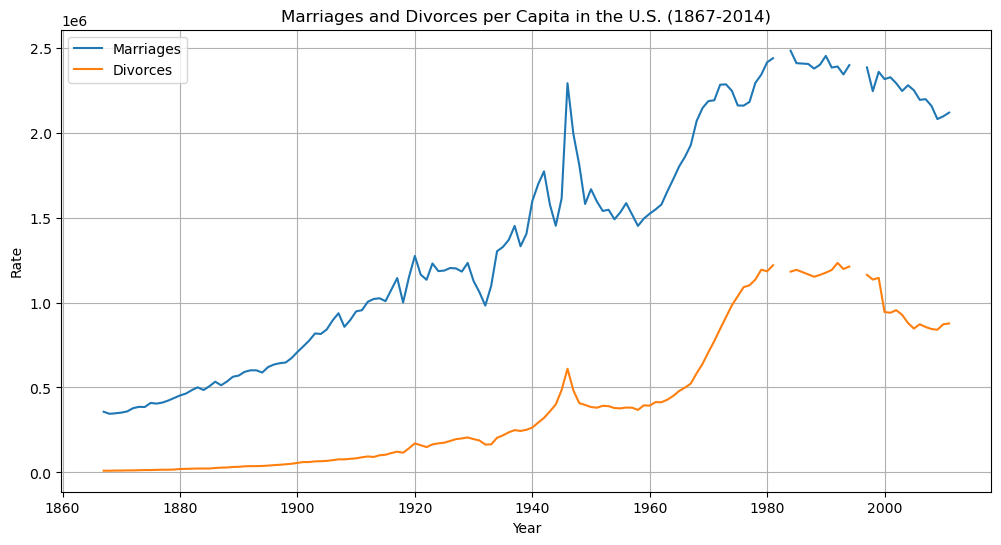

In [74]:
data = pd.read_csv('us-marriages-divorces-1867-2014.csv') 


years = data['Year']
marriages = data['Marriages']
divorces = data['Divorces']


plt.figure(figsize=(12, 6))
plt.plot(years, marriages, label='Marriages')
plt.plot(years, divorces, label='Divorces')

plt.xlabel('Year')
plt.ylabel('Rate')
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.legend()
plt.grid(True)
plt.show()

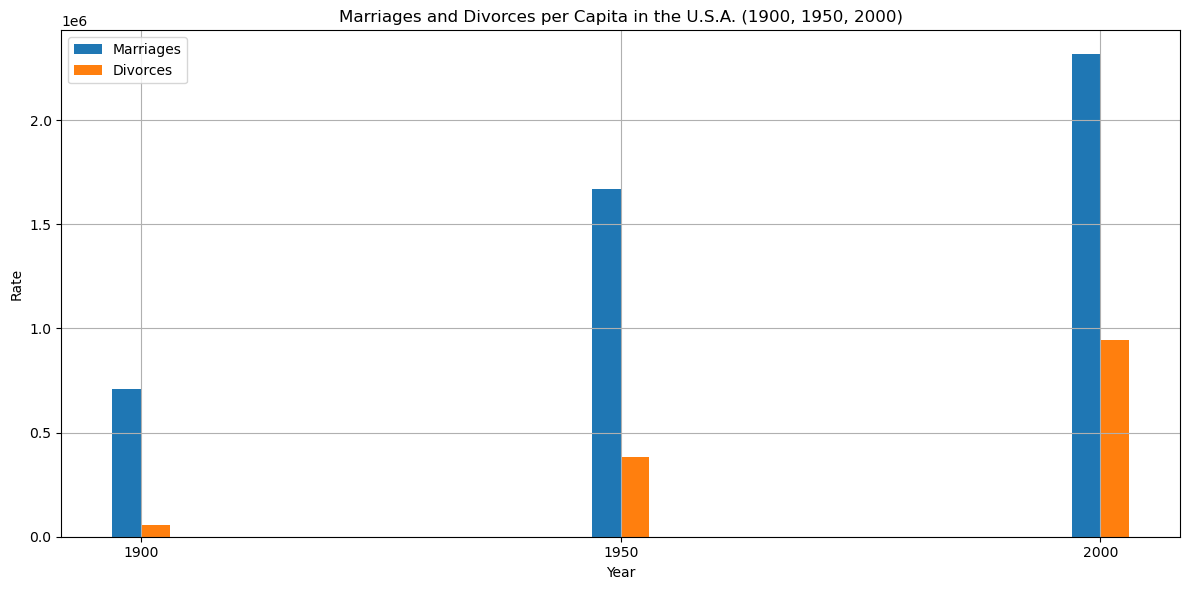

In [75]:
# Question 7
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('us-marriages-divorces-1867-2014.csv')  


years = [1900, 1950, 2000]
filtered_data = data[data['Year'].isin(years)]


marriages = filtered_data['Marriages']
divorces = filtered_data['Divorces']


plt.figure(figsize=(12, 6))
bar_width = 3.0
plt.bar(years, marriages, bar_width, label='Marriages')
plt.bar([x + bar_width for x in years], divorces, bar_width, label='Divorces')

plt.xlabel('Year')
plt.ylabel('Rate')
plt.title('Marriages and Divorces per Capita in the U.S.A. (1900, 1950, 2000)')
plt.xticks([x + bar_width/2 for x in years], years)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


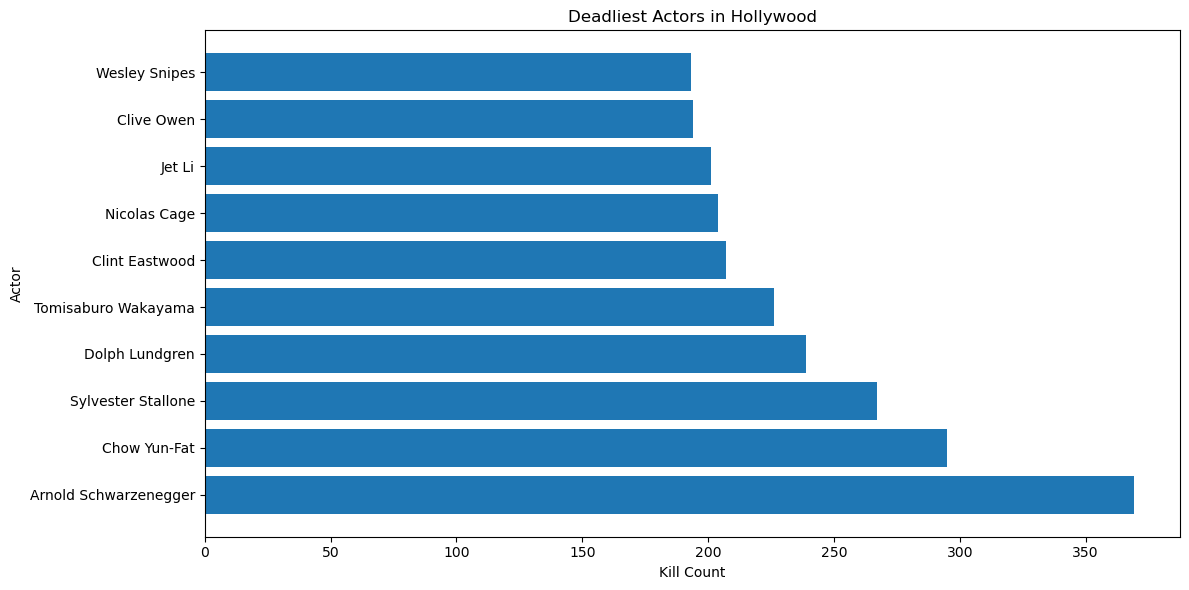

In [76]:
# Question 8

import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('actor_kill_counts.csv')  

data.sort_values(by='Count', ascending=False, inplace=True)


actors = data['Actor']
kill_counts = data['Count']


plt.figure(figsize=(12, 6))
plt.barh(actors, kill_counts)

plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')
plt.tight_layout()
plt.show()


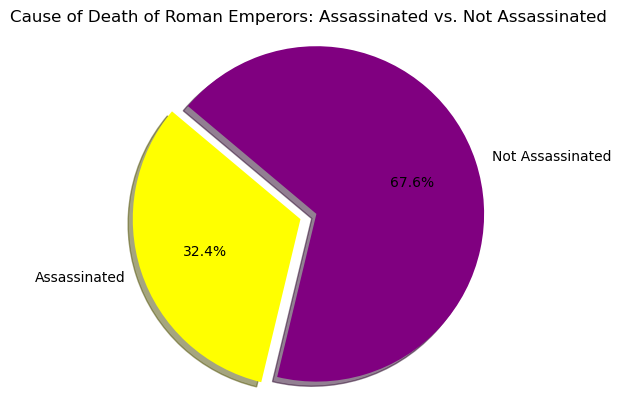

In [77]:
# Question 9
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('roman-emperor-reigns.csv')  


emperors = len(data)
assassinated_emperors = len(data[data['Cause_of_Death'] == 'Assassinated'])


percentage = (assassinated_emperors / emperors) * 100
percentage_survived = 100 - percentage


labels = ['Assassinated', 'Not Assassinated']
sizes = [percentage, percentage_survived]
colors = ['yellow', 'purple']
explode = (0.1, 0)  

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  

plt.title('Cause of Death of Roman Emperors: Assassinated vs. Not Assassinated')
plt.show()


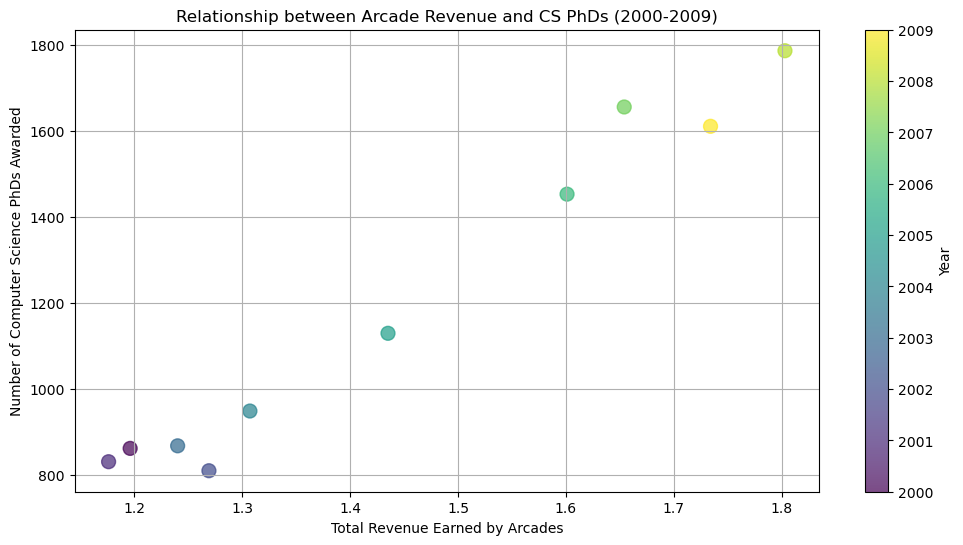

In [78]:
# Question 10
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')  


years = data['Year']
revenue = data['Total Arcade Revenue (billions)']
cs_phds = data['Computer Science Doctorates Awarded (US)']


plt.figure(figsize=(12, 6))
plt.scatter(revenue, cs_phds, c=years, cmap='viridis', s=100, alpha=0.7)

plt.xlabel('Total Revenue Earned by Arcades')
plt.ylabel('Number of Computer Science PhDs Awarded')
plt.title('Relationship between Arcade Revenue and CS PhDs (2000-2009)')
plt.colorbar(label='Year')
plt.grid(True)
plt.show()
